<a href="https://colab.research.google.com/github/anukkrit149/DeepLearning/blob/master/dataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://anukkritshanker.website/projects/trell_datasets/train.csv')
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


DATA Stats

In [3]:
rows , columns = data.shape
print("Rows-"+str(rows)+"\t Columns-"+str(columns))

Rows-159571	 Columns-8


In [4]:
data.equals(data.dropna())
#null check

True

In [0]:
typeOfComment =list(data.columns)[2:] 
EachTypeValue = data.iloc[:,2:].sum(axis=0)

In [6]:
EachTypeValue


toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

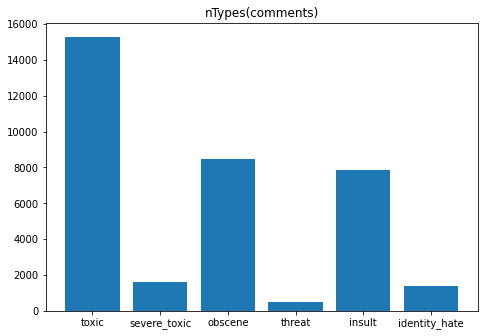

In [7]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.bar(typeOfComment,EachTypeValue)
plt.title('nTypes(comments)')
plt.show()

In [8]:
typeSum = data.iloc[:,2:].sum(axis=1).value_counts()
typeSum

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
dtype: int64

In [0]:
labledComments = data.iloc[:,2:].sum(axis=1).value_counts()[1:]

In [10]:
#total labled comments
labledComments.sum()

16225

In [11]:
#unlabled comments 
len(data)-labledComments.sum()

143346

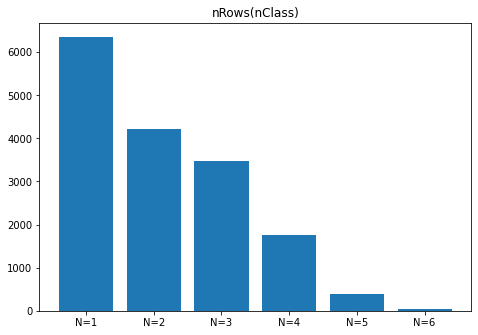

In [12]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
no = ['N='+str(i) for i in range(1,7)]
axes.bar(no,labledComments)
plt.title('nRows(nClass)')
plt.show()


**Cleaning DATA**

In [0]:
#cleaning functions

def cleanTags(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [14]:
data['comment_text'] = data['comment_text'].str.lower()
data['comment_text'] = data['comment_text'].apply(cleanTags)
data['comment_text'] = data['comment_text'].apply(cleanPunc)
data['comment_text'] = data['comment_text'].apply(keepAlpha)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cant make any real suggestions on impro...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0


In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

In [17]:
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['comment_text'] = data['comment_text'].apply(removeStopWords)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore m...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww matches background colour im seemingly ...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy c...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestions improvement ...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats on,0,0,0,0,0,0


In [0]:
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

In [19]:
data['comment_text'] = data['comment_text'].apply(stemming)
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explan edit made usernam hardcor metallica fan...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww match background colour im seem stuck tha...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im realli tri edit war guy constant re...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggest improv wonder section s...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chanc rememb page that on,0,0,0,0,0,0


Model

In [20]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D,Bidirectional
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
import gensim.models.keyedvectors as word2vec
import gc
import tensorflow as tf
import numpy as np
import os
import keras_preprocessing.text as kpt



Using TensorFlow backend.


In [21]:
vocab_processor = tf.contrib.learn.preprocessing.VocabularyProcessor(500)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.


In [0]:
X_train = data['comment_text']
Y_train = data.iloc[:,2:]

In [0]:
test_data =  pd.read_csv('https://anukkritshanker.website/projects/trell_datasets/test.csv')


In [0]:
test_data['comment_text'] = test_data['comment_text'].str.lower()
test_data['comment_text'] = test_data['comment_text'].apply(cleanTags)
test_data['comment_text'] = test_data['comment_text'].apply(cleanPunc)
test_data['comment_text'] = test_data['comment_text'].apply(keepAlpha)
test_data['comment_text'] = test_data['comment_text'].apply(removeStopWords)
test_data['comment_text'] = test_data['comment_text'].apply(stemming)

In [0]:
X_test = test_data['comment_text']

In [0]:
test_labels =  pd.read_csv('https://anukkritshanker.website/projects/trell_datasets/test_labels.csv')

In [0]:
test_labels = test_labels.iloc[:,1:] 

In [0]:
X_train = np.array(list(X_train))
X_test = np.array(list(X_test))

In [0]:
!rm glove.6B.zip

In [46]:
if not os.path.exists('glove.6B.zip'):
    ! wget http://nlp.stanford.edu/data/glove.6B.zip
    ! unzip glove.6B.zip

--2020-03-23 12:07:27--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-03-23 12:07:27--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-03-23 12:07:27--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
EMBEDDING_FILE = 'glove.6B.300d.txt'

In [0]:
embed_size = 300
max_features = 20000 
maxlen = 100 

In [0]:
def get_coefs(word,*arr): 
  return word, np.asarray(arr, dtype='float32')

In [0]:
embeddings_index = dict(get_coefs(*o.strip().split()) for o in open(EMBEDDING_FILE))

In [51]:
all_embs = np.stack(embeddings_index.values())
emb_mean,emb_std = all_embs.mean(), all_embs.std()
emb_mean,emb_std

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


(-0.0039050116, 0.38177028)

In [0]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
list_tokenized_train = tokenizer.texts_to_sequences(X_train)
list_tokenized_test = tokenizer.texts_to_sequences(X_test)

In [0]:
x_train = pad_sequences(list_tokenized_train, maxlen=maxlen)
x_test = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [0]:
word_index = tokenizer.word_index
nb_words = min(max_features, len(word_index))
embedding_matrix = np.random.normal(emb_mean, emb_std, (nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector

In [55]:
inp = Input(shape=(maxlen, ))

In [56]:
x = Embedding(max_features, embed_size, weights=[embedding_matrix])(inp)

In [57]:
x = Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
x = GlobalMaxPool1D()(x)

In [0]:
x = Dropout(0.1)(x)

In [0]:
x = Dense(50, activation="relu")(x)

In [0]:
x = Dropout(0.1)(x)

In [0]:
x = Dense(6, activation="sigmoid")(x)

In [0]:
model = Model(inputs=inp, outputs=x)

In [64]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 300)          6000000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 100)          140400    
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 100)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0   

In [65]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [66]:
model.fit(x_train, Y_train, batch_size=32, epochs=2, validation_split=0.1,use_multiprocessing=True);

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 143613 samples, validate on 15958 samples
Epoch 1/2
143613/143613 [==============================] - 1040s 7ms/step - loss: 0.2792 - acc: 0.9929 - val_loss: 0.2741 - val_acc: 0.9940
Epoch 2/2
143613/143613 [==============================] - 1031s 7ms/step - loss: 0.2635 - acc: 0.9927 - val_loss: 0.2745 - val_acc: 0.9933


In [0]:
result = model.evaluate(x_test,test_labels,batch_size=32,verbose=0,use_multiprocessing=True)

In [68]:
print("\n Test Accuracy-"+str(result[1])+"\n Test Error-"+str(result[0]))


 Test Accuracy-0.9978454467107153
 Test Error--13.830533664668799


In [69]:
!pip install flask

In [0]:
string  = "Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,"

Flask App

In [0]:
import flask as f
from flask_ngrok import run_with_ngrok

app = f.Flask(__name__)
run_with_ngrok(app)


@app.route('/api/model', methods=["POST"])
def index():
  comment = stemming(removeStopWords(cleanTags(cleanPunc(keepAlpha(str(f.request.form['comment']))))))
  res = model.predict(comment)


    response = f.jsonify({
        'comment': comment,
        'result': res
    })
    response.headers.add('Access-Control-Allow-Origin', '*')
    return response



Start the API

In [0]:
if __name__ == '__main__':
    app.run()